###	Processed Data Importing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
eurobank = pd.read_csv('processed_data.csv')

In [ ]:
print("\nVerifying the loaded processed data:")
eurobank.head()


Verifying the loaded processed data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


### Subscribers by Number of Campaigns

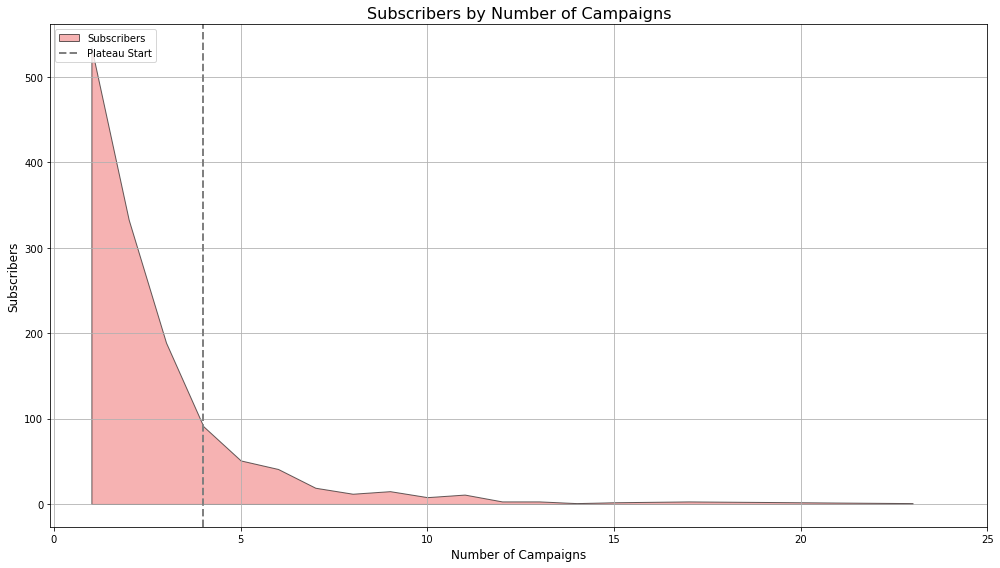

In [ ]:
# Filter for subscribers only
subscribers = eurobank[eurobank['y'] == 'yes']

# Aggregate subscriber data by number of campaigns
campaign_counts = subscribers.groupby('campaign').size()

data = pd.DataFrame({
    'Subscribers': campaign_counts
})

data['Change'] = data['Subscribers'].diff().fillna(0)
data['Change'] = data['Change'].rolling(window=3).mean().fillna(0)

plateau_x = data['Change'].idxmin()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Subscribers on the primary y-axis (left)
ax1.fill_between(data.index, data['Subscribers'], color='Lightcoral', alpha=0.6, label='Subscribers',edgecolor='black')
ax1.set_xlabel('Number of Campaigns', fontsize=12)
ax1.set_ylabel('Subscribers', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

plt.title('Subscribers by Number of Campaigns', fontsize=16)
ax1.grid(True)

tick_interval = 5
x_ticks = range(0, data.index.max() + tick_interval, tick_interval)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks)


ax1.axvline(x=plateau_x, color='grey', linestyle='--', linewidth=2, label='Plateau Start')


ax1.legend(loc='upper left')


plt.tight_layout()
plt.show()

### Non-Subscribers by Number of Campaigns

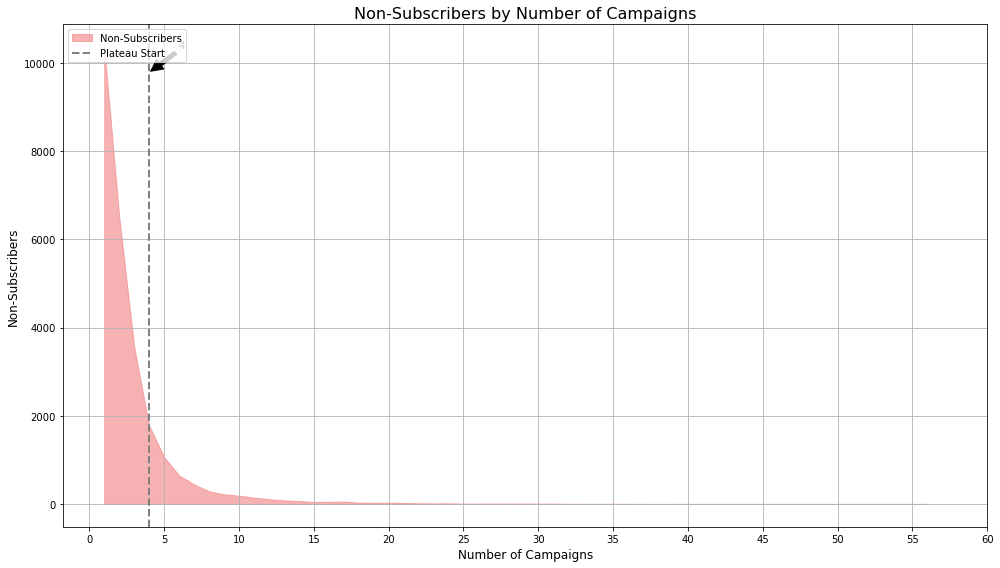

In [ ]:
# Filter for non-subscribers only
non_subscribers = eurobank[eurobank['y'] == 'no']

campaign_counts_non_subs = non_subscribers.groupby('campaign').size()

data_non_subs = pd.DataFrame({
    'Non-Subscribers': campaign_counts_non_subs
})


data_non_subs['Change'] = data_non_subs['Non-Subscribers'].diff().fillna(0)
data_non_subs['Change'] = data_non_subs['Change'].rolling(window=3).mean().fillna(0)  # Smooth the change to identify plateau


plateau_x_non_subs = data_non_subs['Change'].idxmin()


average_contacts = data_non_subs['Non-Subscribers'].mean()

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.fill_between(data_non_subs.index, data_non_subs['Non-Subscribers'], color='Lightcoral', alpha=0.6, label='Non-Subscribers')
ax1.set_xlabel('Number of Campaigns', fontsize=12)
ax1.set_ylabel('Non-Subscribers', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

plt.title('Non-Subscribers by Number of Campaigns', fontsize=16)
ax1.grid(True)


tick_interval = 5
x_ticks = range(0, data_non_subs.index.max() + tick_interval, tick_interval)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks)

ax1.axvline(x=plateau_x_non_subs, color='grey', linestyle='--', linewidth=2, label='Plateau Start')

ax1.annotate(f'{plateau_x_non_subs}', xy=(plateau_x_non_subs, ax1.get_ylim()[1]*0.9), xytext=(plateau_x_non_subs + 2, ax1.get_ylim()[1]*0.95),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='black')


ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Subscribers by Euribor 3 Months

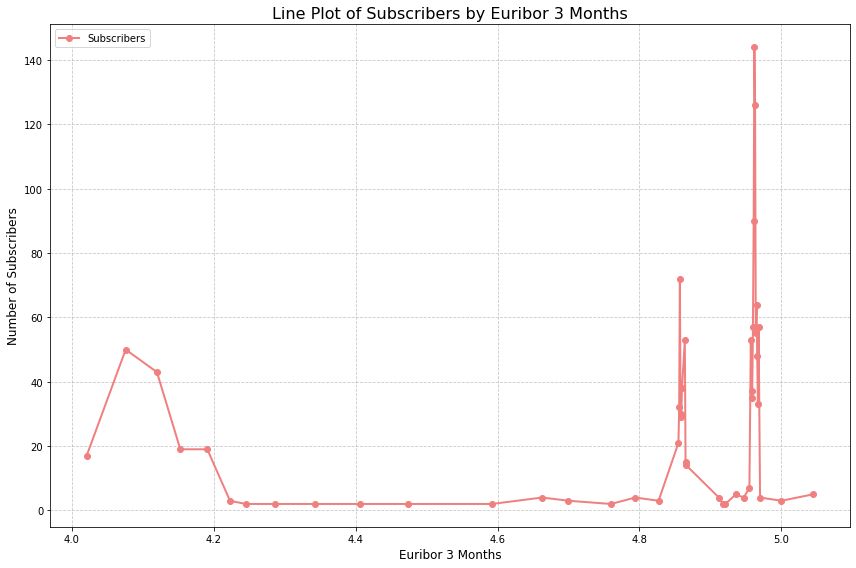

In [ ]:
# Filter for subscribers only
subscribers = eurobank[eurobank['y'] == 'yes']

# Group by 'euribor3m' and count the number of subscribers
euribor_counts = subscribers.groupby('euribor3m').size().reset_index(name='count')

euribor_counts = euribor_counts.sort_values('euribor3m')

plt.figure(figsize=(12, 8))

plt.plot(euribor_counts['euribor3m'], euribor_counts['count'], marker='o', linestyle='-', color='lightcoral', linewidth=2, markersize=6, label='Subscribers')

plt.title('Line Plot of Subscribers by Euribor 3 Months', fontsize=16)
plt.xlabel('Euribor 3 Months', fontsize=12)
plt.ylabel('Number of Subscribers', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()

plt.tight_layout()
plt.show()